In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.0f}'.format)

def p50(x):
  return x.quantile(0.5)

def p95(x):
  return x.quantile(0.9)

def load_data(results_path):
  df = pd.read_csv(results_path)
  # rename Comparisons to Cells (old format used a different name)
  df.rename(columns={"Comparisons": "Cells"}, inplace=True)
  df["Matrix Size"] = (df["Length A"]+1) * (df["Length B"]+1)
  return df

def aggregate(df, measure_name):
  return df.groupby(["Algorithm"]).agg({measure_name: ["min", "max", "mean", p50, p95]})

def plot_y_vs_x(df, y, x):
  plot = plt.scatter
  #plot = plt.loglog

  for algorithm in df["Algorithm"].unique():
    subset = df[df["Algorithm"] == algorithm].sort_values(x)
    plot(subset[x], subset[y], label=algorithm)

  plt.xlabel(x)
  plt.ylabel(y)
  plt.legend()
  plt.title(f"{y} vs {x}")
  plt.show()

def boxplot(df, measure_name):
  df.boxplot(column=measure_name, by='Algorithm', grid=True)

  plt.title(f'Box Plot of {measure_name}')
  plt.suptitle('')  # Suppress the default title to make it cleaner
  plt.xlabel('Algorithm')
  plt.ylabel(measure_name)
  #plt.yscale('log')  # If you want a logarithmic scale
  plt.xticks(rotation=45)  # Rotate the algorithm names for better readability if needed
  plt.show()

In [3]:
csv_path = "data.csv"
df = load_data(csv_path)
aggregate(df, "Cells")

Cells                                 
                       min      max    mean     p50     p95
Algorithm                                                  
DIJKSTRA            415119   825396  635322  641078  795215
SEED                365863   801950  593980  601241  767613
SEED_PRUNING        317060   921467  586036  600610  824203
WAGNER_FISCHER     1000000  1000000 1000000 1000000 1000000
ZERO_STRAIGHTLINE   226403   520238  347176  335947  473629

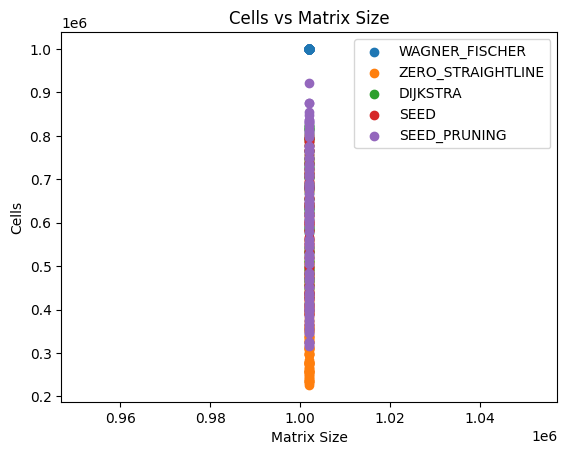

In [4]:
plot_y_vs_x(df, "Cells", "Matrix Size")

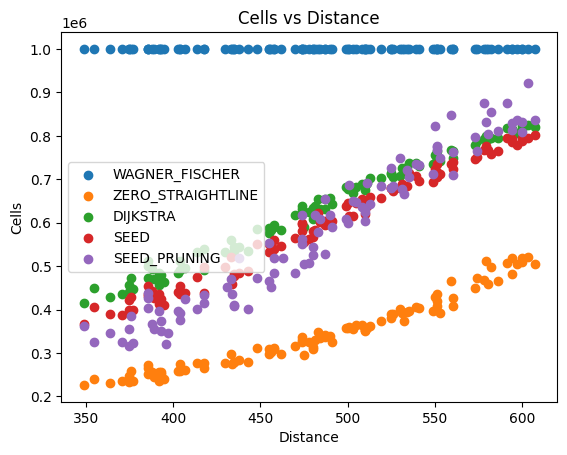

In [5]:
plot_y_vs_x(df, "Cells", "Distance") # Useful if strings are all same length

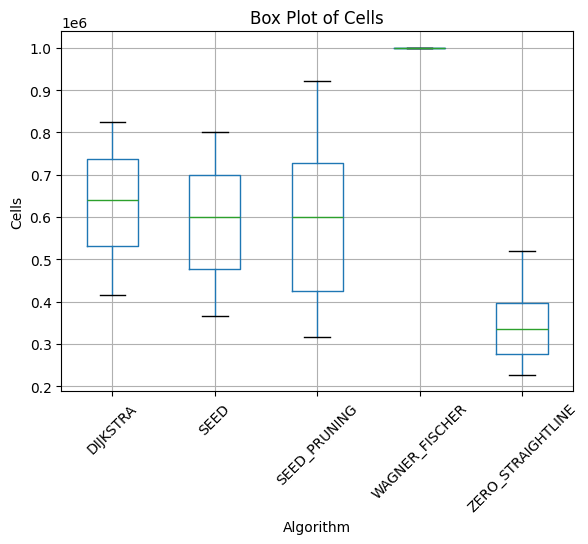

In [6]:
boxplot(df, "Cells")